In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy

In [2]:
df = pd.read_csv("loan_data_set.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [117]:
print(df.shape)

(614, 13)


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## data preprocessing

In [122]:
df.Loan_ID.value_counts(dropna=False)

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

In [7]:
df = df.drop(['Loan_ID'], axis = 1)
# drop unnecessary variable

In [9]:
df.isnull().sum()
# counting missing values 

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# replacing missing values for categorical values 
# the imputation for categorical variables will be performed using mode.

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [13]:
# replacing missing values for numerical variable
# imputation for numerical variables using mean.

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())


In [15]:
string_columns = df.select_dtypes(include=['object'])
string_columns.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [17]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History', 'Loan_Amount_Term']
print(categorical_columns)

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


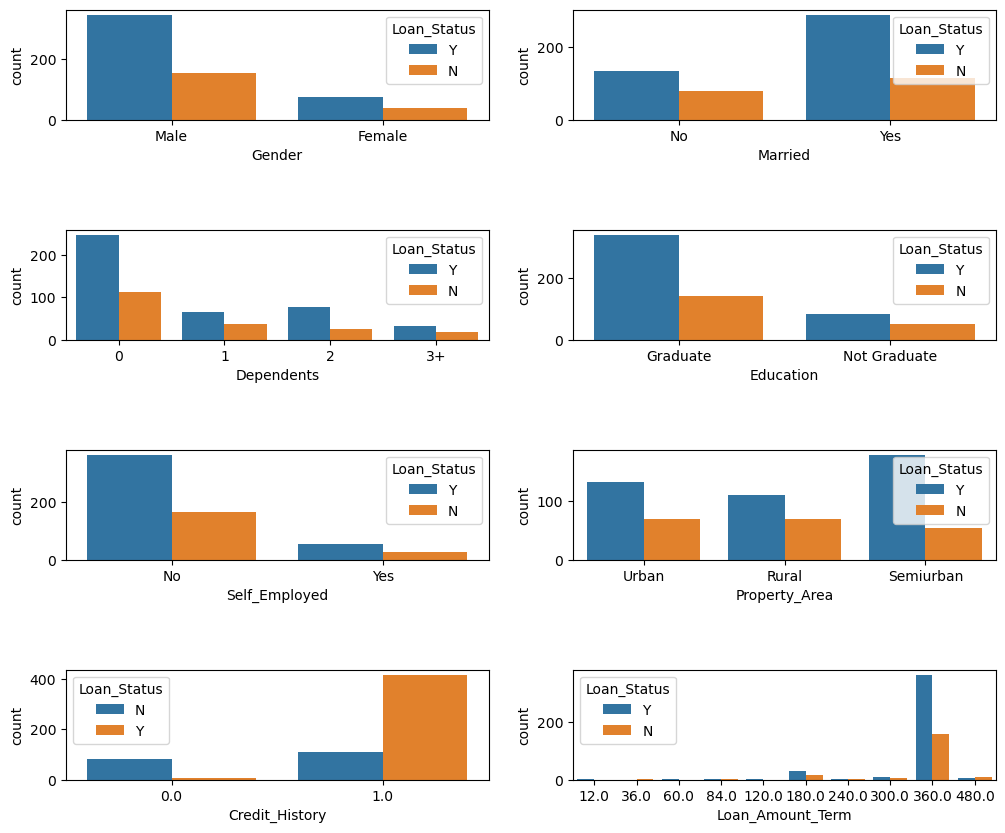

In [19]:
fig,axes = plt.subplots(4,2,figsize=(12,10))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  614.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   84.037468
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.250000
50%        3812.500000        1188.500000  129.000000
75%        5795.000000        2297.250000  164.750000
max       81000.000000       41667.000000  700.000000


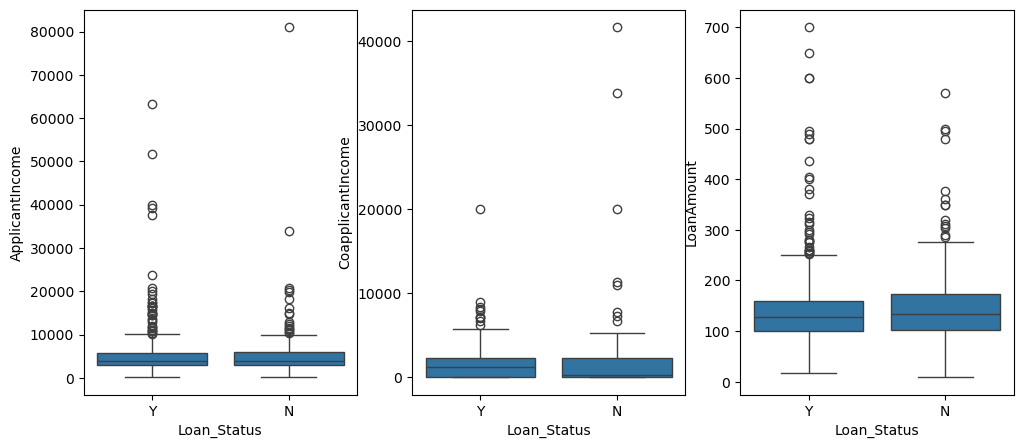

In [21]:
fig,axes = plt.subplots(1,3,figsize=(12,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=2)

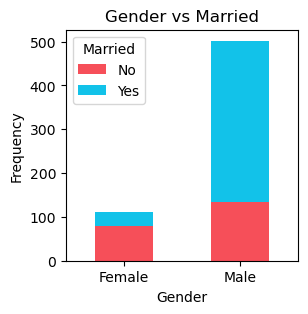

In [23]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(3,3), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

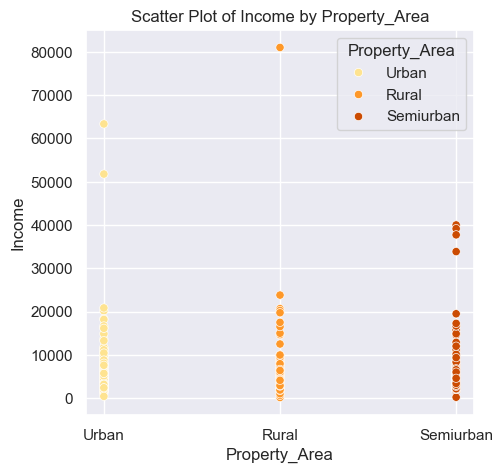

In [142]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Property_Area', y='ApplicantIncome', data=df, hue = 'Property_Area', palette='YlOrBr')
plt.title('Scatter Plot of Income by Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Income')
plt.show()

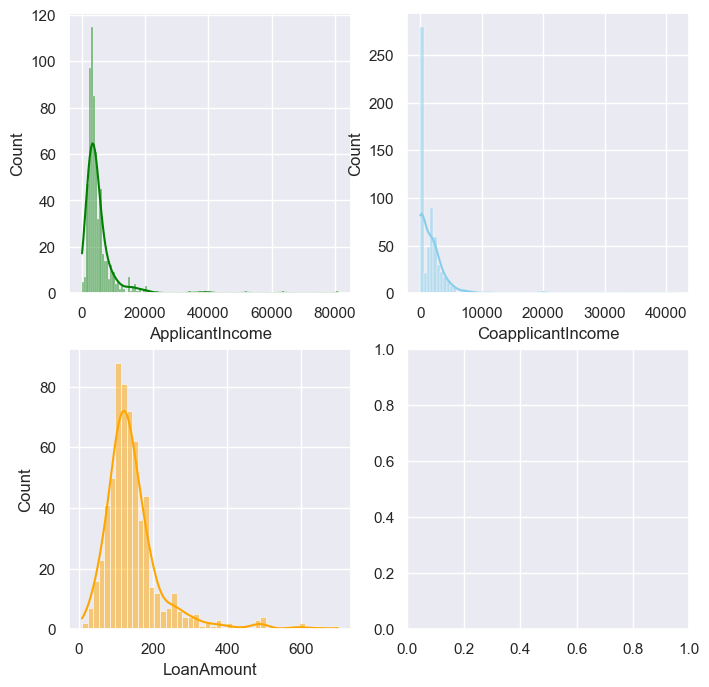

In [25]:
# Distribution of Numerical variables 

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(8,8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

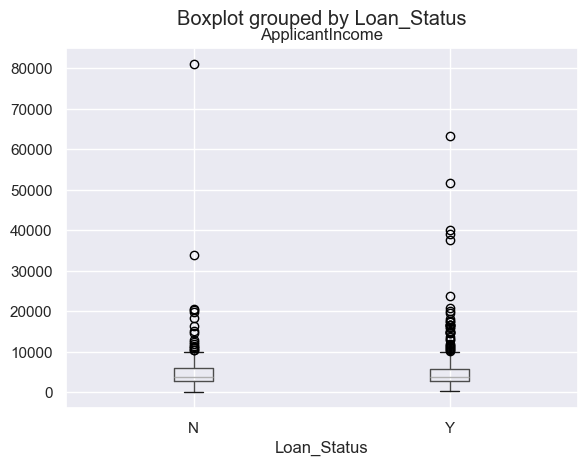

<Figure size 600x600 with 0 Axes>

In [27]:
df.boxplot( column = 'ApplicantIncome',by= 'Loan_Status')
plt.figure(figsize=(6,6))
plt.show()

Skewed Distribution Treatment.
It already shown that distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is negatively skewed. 
I will use log transformation to normalized the distribution.

In [29]:
# apply LOG transformation
df['ApplicantIncomelog'] = np.log(df['ApplicantIncome'] +1)
df['CoapplicantIncomelog'] = np.log(df['CoapplicantIncome'] +1)
df['LoanAmountlog'] = np.log(df['LoanAmount']+1)

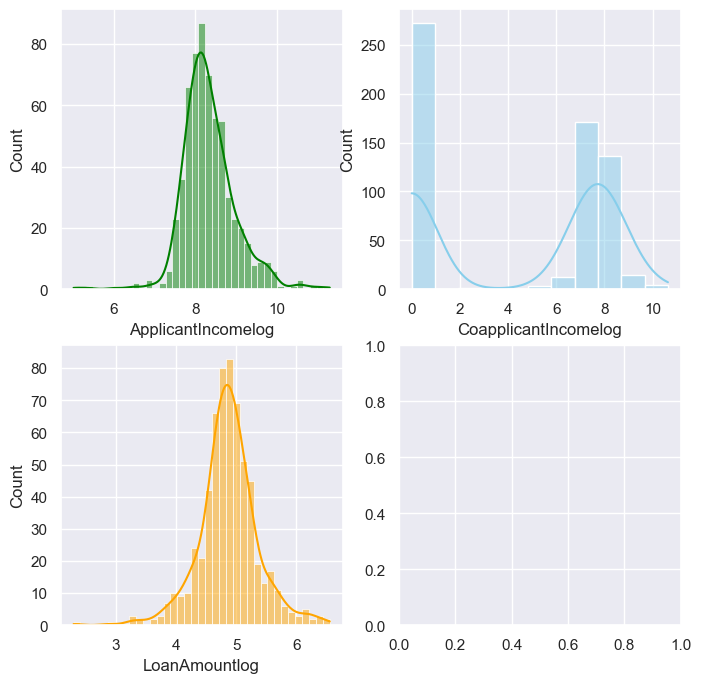

In [31]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(8,8))

sns.histplot(data=df, x="ApplicantIncomelog", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncomelog", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmountlog", kde=True, ax=axs[1, 0], color='orange');

In [33]:
# REMOVING OUTLIERS

numeric_df = df.select_dtypes(include=[np.number])


Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((numeric_df < (Q1 - 1.5 * IQR)) |(numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [35]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674197,0.000000,4.993232
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430327,7.319202,4.859812
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006701,0.000000,4.204693
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.857094,7.765993,4.795791
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699681,0.000000,4.955827


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 0 to 612
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                381 non-null    object 
 1   Married               381 non-null    object 
 2   Dependents            381 non-null    object 
 3   Education             381 non-null    object 
 4   Self_Employed         381 non-null    object 
 5   ApplicantIncome       381 non-null    int64  
 6   CoapplicantIncome     381 non-null    float64
 7   LoanAmount            381 non-null    float64
 8   Loan_Amount_Term      381 non-null    float64
 9   Credit_History        381 non-null    float64
 10  Property_Area         381 non-null    object 
 11  Loan_Status           381 non-null    object 
 12  ApplicantIncomelog    381 non-null    float64
 13  CoapplicantIncomelog  381 non-null    float64
 14  LoanAmountlog         381 non-null    float64
dtypes: float64(7), int64(1), obj

<Axes: >

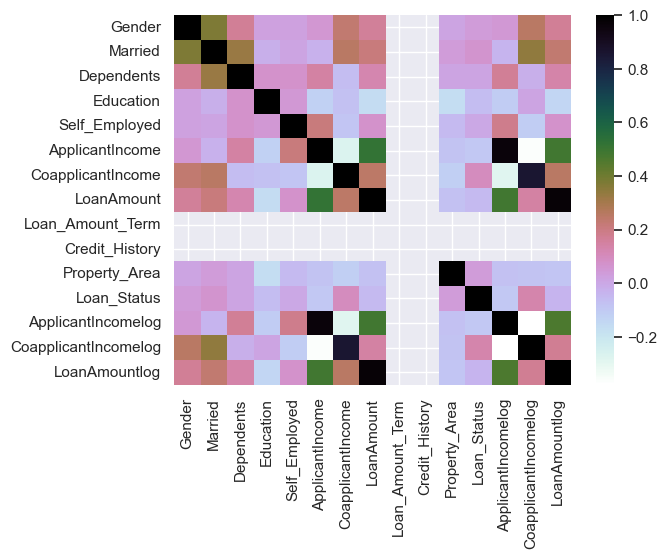

In [97]:
sns.heatmap(df.corr() ,cmap='cubehelix_r')


In [101]:
#correlation table
# correlation table
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)


C:\Users\preet\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\preet\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog
Gender,1.00,0.37,0.17,0.02,0.02,0.05,0.23,0.16,nan,nan,0.01,0.04,0.05,0.25,0.17
Married,0.37,1.00,0.32,-0.02,0.01,-0.03,0.25,0.21,nan,nan,0.04,0.06,-0.04,0.34,0.23
Dependents,0.17,0.32,1.00,0.07,0.07,0.15,-0.06,0.12,nan,nan,0.01,0.01,0.17,-0.02,0.13
Education,0.02,-0.02,0.07,1.00,0.05,-0.12,-0.07,-0.16,nan,nan,-0.16,-0.07,-0.11,0.01,-0.14
Self_Employed,0.02,0.01,0.07,0.05,1.00,0.21,-0.09,0.07,nan,nan,-0.05,-0.00,0.19,-0.11,0.07
ApplicantIncome,0.05,-0.03,0.15,-0.12,0.21,1.00,-0.27,0.52,nan,nan,-0.08,-0.09,0.97,-0.37,0.49
CoapplicantIncome,0.23,0.25,-0.06,-0.07,-0.09,-0.27,1.00,0.25,nan,nan,-0.12,0.10,-0.28,0.86,0.25
LoanAmount,0.16,0.21,0.12,-0.16,0.07,0.52,0.25,1.00,nan,nan,-0.07,-0.05,0.48,0.15,0.97
Loan_Amount_Term,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Credit_History,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [86]:
# encoding technique: 
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in cols:
 df[col] = le.fit_transform(df[col])

## MODEL BUILDING

In [39]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [43]:
from sklearn.preprocessing import scale
X_scaled=pd.DataFrame(scale(df.drop("Loan_Status" , axis = 1)))

### Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.22      0.42      0.29        12
           1       0.87      0.72      0.79        65

    accuracy                           0.68        77
   macro avg       0.54      0.57      0.54        77
weighted avg       0.77      0.68      0.71        77

67.53% Accurate


### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.84      0.94      0.88        65

    accuracy                           0.79        77
   macro avg       0.42      0.47      0.44        77
weighted avg       0.71      0.79      0.75        77

79.22% Accurate


### XGBoost

In [79]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.12      0.08      0.10        12
           1       0.84      0.89      0.87        65

    accuracy                           0.77        77
   macro avg       0.48      0.49      0.48        77
weighted avg       0.73      0.77      0.75        77

76.62% Accurate


### Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))
print(f"{round(LR_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.84      1.00      0.92        65

    accuracy                           0.84        77
   macro avg       0.42      0.50      0.46        77
weighted avg       0.71      0.84      0.77        77

accuracy is 0.8441558441558441
84.42% Accurate


C:\Users\preet\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\preet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\preet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

In [83]:
score = [DT_SC,RF_SC,XGB_SC,LR_SC]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
3,Logistic Regression,0.844156
1,Random Forest,0.792208
2,XGBoost,0.766234
0,Decision Tree,0.675325
